In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [3]:
folder = Path('D:/ProgProjekte/Python/Results-Exact-Study/Patches')

In [4]:
path = folder/"ExpertAlgorithm/NrExperts"

In [5]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=True, 
                      max_rotate=90,  
                      #max_lighting=0.0, 
                      #max_zoom=2, 
                      #max_warp=0.2,
                      #p_affine=0.75,
                      #p_lighting=0.75,  
                      #xtra_tfms=xtra_tfms,
                     )

In [6]:
def get_data(folder, bs,size):
    data = ImageDataBunch.from_folder(folder, train="train", valid="val", size=size, bs=bs, ds_tfms=tfms, num_workers=0)
    return data.normalize()

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_10


epoch,train_loss,valid_loss,accuracy,time
0,0.782187,1.703629,0.610236,00:24
1,0.644924,0.445168,0.814961,00:24
2,0.494153,0.372705,0.834083,00:24


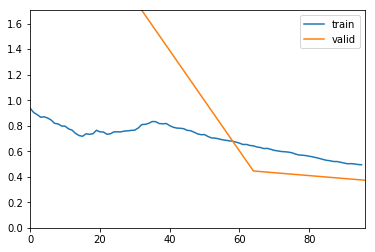

epoch,train_loss,valid_loss,accuracy,time
0,0.344945,0.321102,0.865579,00:24
1,0.303817,0.281647,0.883015,00:24
2,0.282166,0.218727,0.916760,00:24
3,0.245709,0.234154,0.906637,00:25
4,0.229536,0.226463,0.909449,00:25


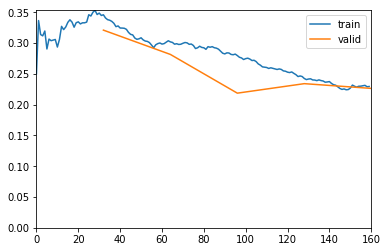

epoch,train_loss,valid_loss,accuracy,time
0,0.824765,2.051226,0.642857,00:23
1,0.712522,0.760363,0.745782,00:24
2,0.545677,0.388804,0.824522,00:25


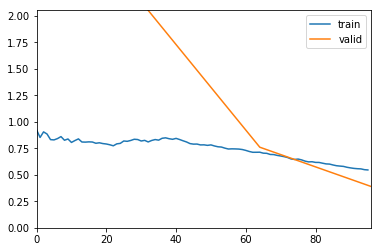

epoch,train_loss,valid_loss,accuracy,time
0,0.340221,0.312269,0.866704,00:25
1,0.299038,0.258716,0.896513,00:26
2,0.271143,0.248097,0.897638,00:27
3,0.246755,0.241789,0.900450,00:26
4,0.231801,0.233171,0.902137,00:26


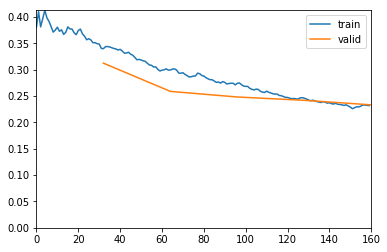

epoch,train_loss,valid_loss,accuracy,time
0,0.853625,1.523755,0.672103,00:24
1,0.697184,0.593800,0.805399,00:24
2,0.533195,0.410027,0.816648,00:25


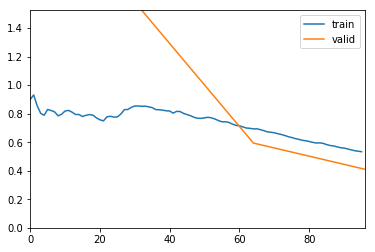

epoch,train_loss,valid_loss,accuracy,time
0,0.345466,0.340032,0.858268,00:25
1,0.318169,0.306653,0.864454,00:25
2,0.287007,0.282336,0.886952,00:25
3,0.264480,0.251142,0.904387,00:27
4,0.247460,0.241052,0.912261,00:26


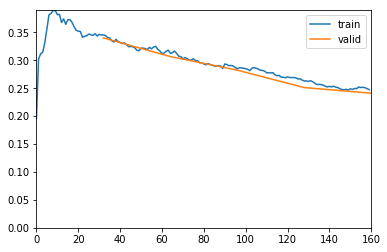

epoch,train_loss,valid_loss,accuracy,time
0,0.780554,0.911877,0.738470,00:24
1,0.653390,0.398432,0.831271,00:24
2,0.476716,0.324560,0.866704,00:25


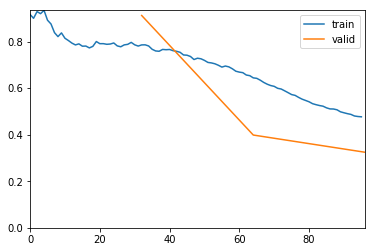

epoch,train_loss,valid_loss,accuracy,time
0,0.340964,0.281110,0.890889,00:26
1,0.304517,0.247488,0.901012,00:26
2,0.279716,0.241999,0.903825,00:26
3,0.251637,0.240264,0.901575,00:26
4,0.237630,0.234684,0.904949,00:25


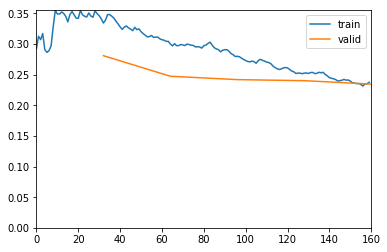

epoch,train_loss,valid_loss,accuracy,time
0,0.756417,0.822732,0.742970,00:24
1,0.623264,0.488653,0.796400,00:24
2,0.486559,0.397159,0.829021,00:25


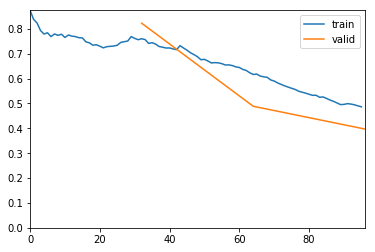

epoch,train_loss,valid_loss,accuracy,time
0,0.343072,0.305197,0.871766,00:26
1,0.300374,0.271831,0.891451,00:27
2,0.269912,0.244686,0.903262,00:26
3,0.242911,0.230945,0.906074,00:25
4,0.229762,0.234354,0.908324,00:26


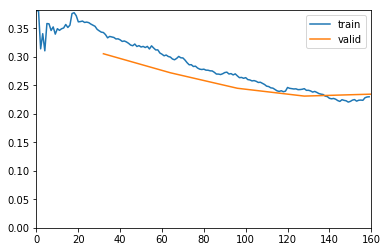

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_2


epoch,train_loss,valid_loss,accuracy,time
0,0.721749,1.058947,0.742407,00:23
1,0.582969,0.531758,0.827897,00:23
2,0.436275,0.377873,0.847582,00:23


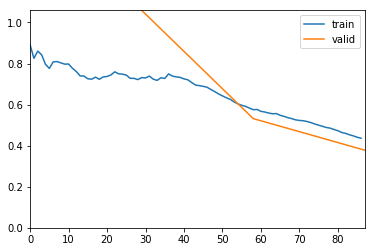

epoch,train_loss,valid_loss,accuracy,time
0,0.281568,0.312640,0.876265,00:25
1,0.253368,0.296283,0.884139,00:24
2,0.222397,0.249343,0.897638,00:24
3,0.202579,0.257772,0.887514,00:24
4,0.181755,0.256918,0.887514,00:25


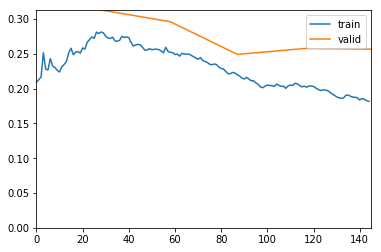

epoch,train_loss,valid_loss,accuracy,time
0,0.793306,1.223075,0.673228,00:23
1,0.632532,0.539449,0.834646,00:22
2,0.493855,0.393191,0.843082,00:23


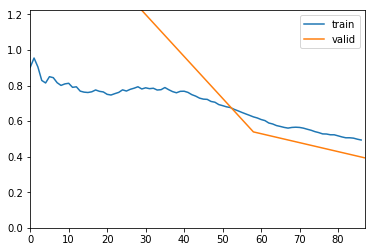

epoch,train_loss,valid_loss,accuracy,time
0,0.354832,0.347623,0.861642,00:24
1,0.294562,0.279492,0.891451,00:24
2,0.261795,0.299014,0.880765,00:24
3,0.217445,0.249502,0.902700,00:24
4,0.197501,0.258209,0.897638,00:24


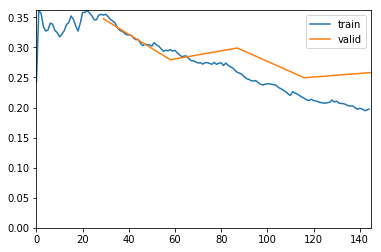

epoch,train_loss,valid_loss,accuracy,time
0,0.761775,0.933368,0.756468,00:22
1,0.637650,0.459605,0.812148,00:23
2,0.473896,0.435844,0.825084,00:23


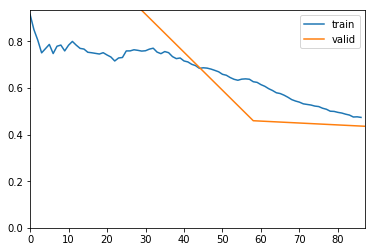

epoch,train_loss,valid_loss,accuracy,time
0,0.304245,0.333029,0.867267,00:24
1,0.255852,0.260413,0.906074,00:24
2,0.231770,0.242853,0.908324,00:24
3,0.197478,0.234254,0.917885,00:25
4,0.187274,0.232590,0.916760,00:24


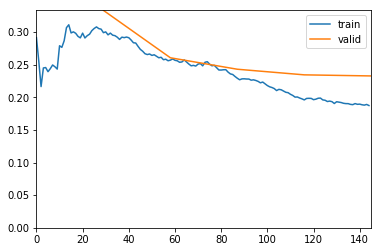

epoch,train_loss,valid_loss,accuracy,time
0,0.756585,1.466683,0.742970,00:22
1,0.637269,0.551762,0.805962,00:23
2,0.492931,0.364603,0.845332,00:23


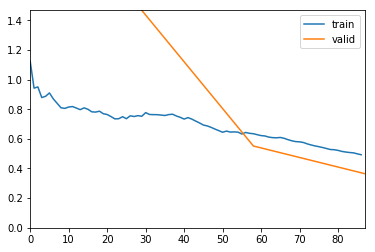

epoch,train_loss,valid_loss,accuracy,time
0,0.278731,0.309417,0.870641,00:24
1,0.248160,0.503095,0.899888,00:24
2,0.214754,0.339383,0.897075,00:25
3,0.185155,0.233632,0.897075,00:25
4,0.174003,0.216169,0.902700,00:24


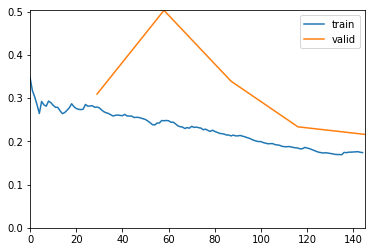

epoch,train_loss,valid_loss,accuracy,time
0,0.723191,1.210867,0.687289,00:22
1,0.636883,0.676966,0.795838,00:23
2,0.488704,0.391483,0.823960,00:24


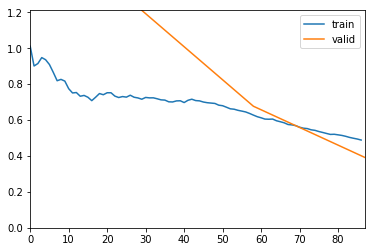

epoch,train_loss,valid_loss,accuracy,time
0,0.323749,0.364529,0.832958,00:24
1,0.286050,0.277314,0.886952,00:24
2,0.241133,0.266456,0.883015,00:25
3,0.211517,0.239234,0.894263,00:24
4,0.184178,0.256731,0.888076,00:25


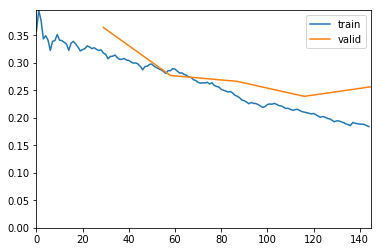

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_3


epoch,train_loss,valid_loss,accuracy,time
0,0.784759,1.215488,0.685039,00:23
1,0.651077,0.438179,0.831834,00:24
2,0.482000,0.450318,0.804837,00:23


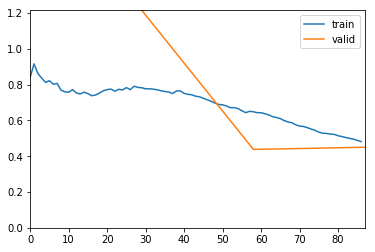

epoch,train_loss,valid_loss,accuracy,time
0,0.289782,0.358324,0.843082,00:25
1,0.259927,0.314373,0.871204,00:25
2,0.240032,0.281954,0.883015,00:24
3,0.214515,0.269473,0.890889,00:24
4,0.197193,0.282170,0.885827,00:24


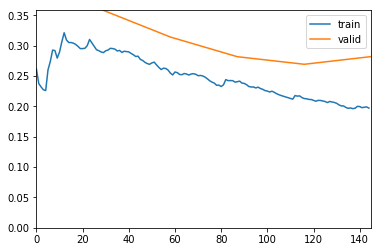

epoch,train_loss,valid_loss,accuracy,time
0,0.719741,1.818349,0.686727,00:22
1,0.622597,0.488121,0.820023,00:24
2,0.447567,0.358046,0.862767,00:24


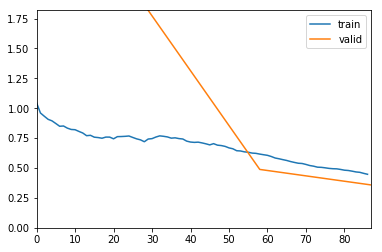

epoch,train_loss,valid_loss,accuracy,time
0,0.265372,0.348669,0.869516,00:25
1,0.254699,0.300098,0.877953,00:24
2,0.228079,0.253155,0.897638,00:24
3,0.207842,0.263551,0.885264,00:24
4,0.185103,0.249383,0.897075,00:25


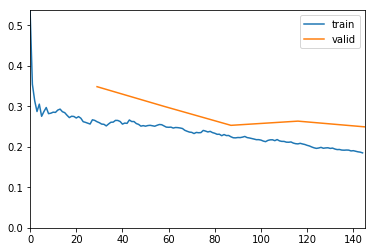

epoch,train_loss,valid_loss,accuracy,time
0,0.749211,0.993981,0.761530,00:22
1,0.611658,0.496511,0.817773,00:24
2,0.471749,0.422146,0.829021,00:24


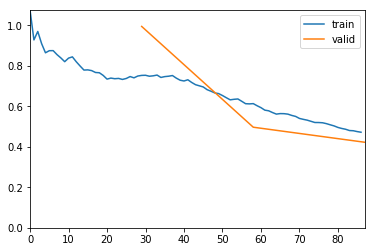

epoch,train_loss,valid_loss,accuracy,time
0,0.315731,0.418835,0.881327,00:25
1,0.266436,0.485198,0.907762,00:25
2,0.231994,0.494829,0.901012,00:25
3,0.208508,0.240791,0.901012,00:24
4,0.191799,0.236000,0.902700,00:24


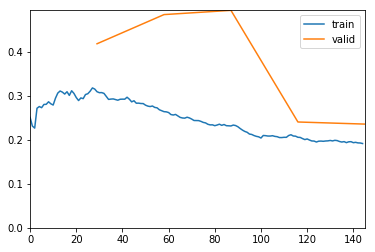

epoch,train_loss,valid_loss,accuracy,time
0,0.774411,1.114446,0.700225,00:22
1,0.622322,0.426724,0.827897,00:24
2,0.477370,0.395864,0.827897,00:24


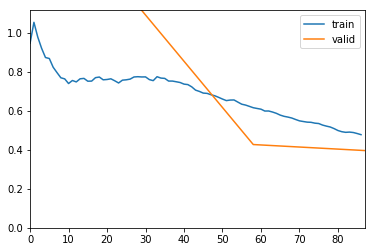

epoch,train_loss,valid_loss,accuracy,time
0,0.316373,0.330721,0.867829,00:25
1,0.295474,0.277312,0.889764,00:25
2,0.245935,0.259161,0.893701,00:24
3,0.215731,0.228634,0.906074,00:24
4,0.198558,0.226874,0.906637,00:23


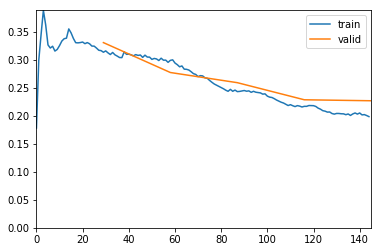

epoch,train_loss,valid_loss,accuracy,time
0,0.768757,1.165955,0.669854,00:22
1,0.614127,0.469941,0.814398,00:24
2,0.456719,0.391666,0.828459,00:24


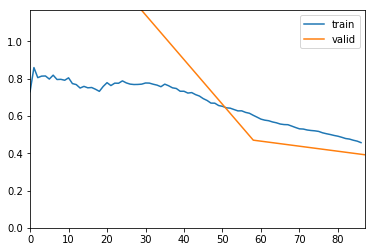

epoch,train_loss,valid_loss,accuracy,time
0,0.312246,0.339827,0.858268,00:24
1,0.270702,0.325085,0.871766,00:25
2,0.242578,0.278722,0.893701,00:25
3,0.230089,0.266129,0.900450,00:24
4,0.206557,0.271524,0.898200,00:25


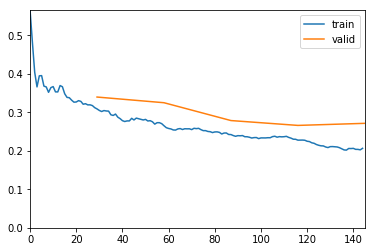

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_4


epoch,train_loss,valid_loss,accuracy,time
0,0.749063,1.738543,0.655231,00:24
1,0.623560,0.513694,0.830146,00:24
2,0.473260,0.399152,0.836895,00:25


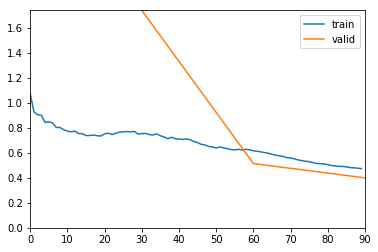

epoch,train_loss,valid_loss,accuracy,time
0,0.332852,0.370941,0.840270,00:25
1,0.297666,0.291856,0.871766,00:25
2,0.249114,0.247264,0.895950,00:25
3,0.214666,0.254442,0.885827,00:26
4,0.212599,0.245384,0.890889,00:24


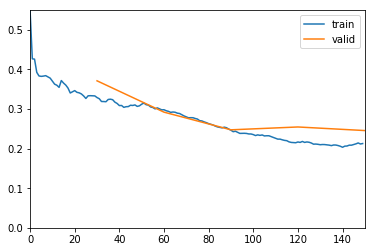

epoch,train_loss,valid_loss,accuracy,time
0,0.785235,1.997561,0.598425,00:22
1,0.620787,0.592039,0.769404,00:23
2,0.477469,0.400662,0.826772,00:24


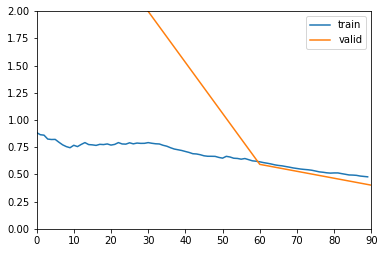

epoch,train_loss,valid_loss,accuracy,time
0,0.323584,0.339986,0.861080,00:25
1,0.272635,0.260310,0.898763,00:25
2,0.239727,0.236825,0.903825,00:25
3,0.208259,0.228882,0.907199,00:24
4,0.191715,0.237649,0.899325,00:24


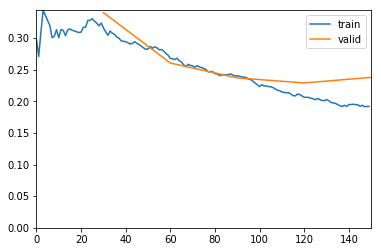

epoch,train_loss,valid_loss,accuracy,time
0,0.781170,1.458324,0.716535,00:22
1,0.631705,0.544789,0.835208,00:23
2,0.504257,0.343355,0.858268,00:24


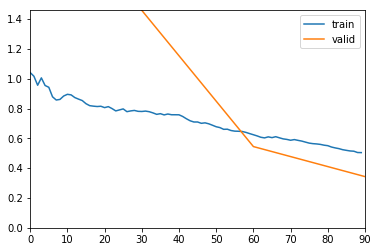

epoch,train_loss,valid_loss,accuracy,time
0,0.302321,0.308411,0.875703,00:25
1,0.275939,0.260325,0.890889,00:25
2,0.240142,0.218838,0.919573,00:26
3,0.217155,0.226047,0.912823,00:25
4,0.190341,0.225469,0.914511,00:26


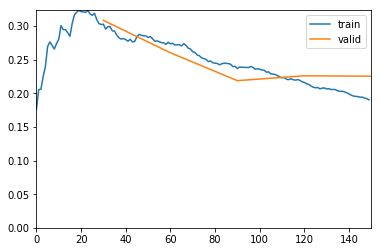

epoch,train_loss,valid_loss,accuracy,time
0,0.845954,1.306094,0.714286,00:23
1,0.671762,0.537411,0.802587,00:23
2,0.494456,0.416633,0.803150,00:24


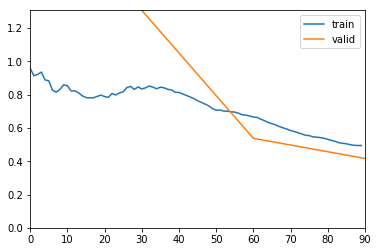

epoch,train_loss,valid_loss,accuracy,time
0,0.309318,0.330247,0.859955,00:25
1,0.280035,0.286507,0.886389,00:25
2,0.242294,0.248407,0.903825,00:25
3,0.206545,0.245344,0.898763,00:25
4,0.187252,0.241380,0.902700,00:24


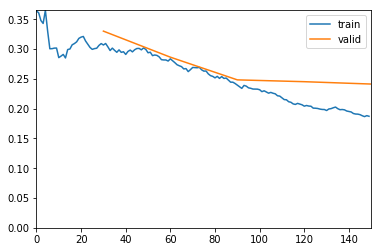

epoch,train_loss,valid_loss,accuracy,time
0,0.761780,1.635276,0.676603,00:23
1,0.663973,0.684987,0.757030,00:24
2,0.503493,0.417022,0.814398,00:24


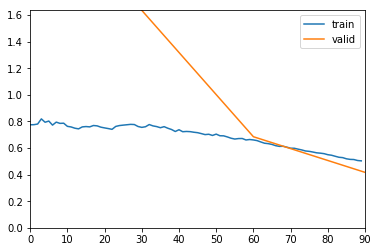

epoch,train_loss,valid_loss,accuracy,time
0,0.319772,0.367648,0.840832,00:25
1,0.274338,0.302646,0.873453,00:25
2,0.236762,0.288961,0.877953,00:26
3,0.216592,0.274199,0.884139,00:25
4,0.201873,0.258206,0.888639,00:27


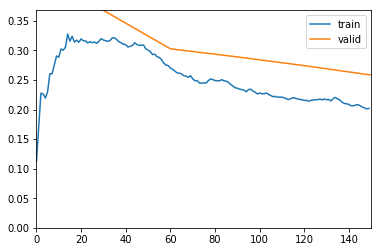

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_5


epoch,train_loss,valid_loss,accuracy,time
0,0.810660,1.500678,0.688976,00:24
1,0.683356,0.541270,0.786839,00:24
2,0.521447,0.427562,0.829584,00:24


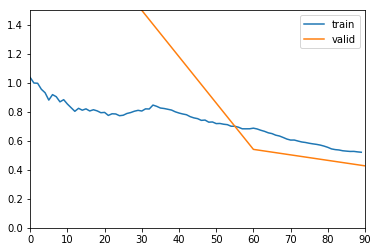

epoch,train_loss,valid_loss,accuracy,time
0,0.403020,0.345947,0.866142,00:25
1,0.322472,0.288176,0.879640,00:25
2,0.279536,0.255557,0.909449,00:25
3,0.237604,0.241768,0.899888,00:25
4,0.217943,0.241291,0.904387,00:25


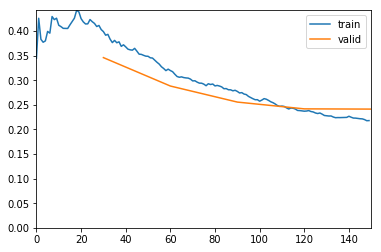

epoch,train_loss,valid_loss,accuracy,time
0,0.743776,1.497915,0.699100,00:23
1,0.670896,0.473759,0.821710,00:24
2,0.505610,0.377412,0.834646,00:24


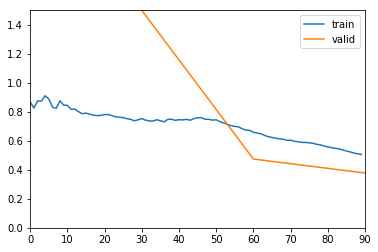

epoch,train_loss,valid_loss,accuracy,time
0,0.334234,0.306239,0.877390,00:25
1,0.297439,0.258536,0.897075,00:25
2,0.253864,0.231055,0.906637,00:25
3,0.224701,0.215535,0.917323,00:24
4,0.207043,0.211510,0.915636,00:24


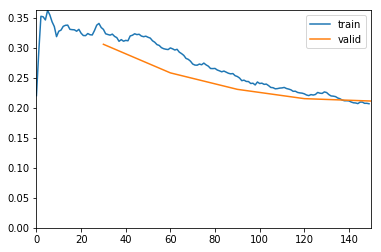

epoch,train_loss,valid_loss,accuracy,time
0,0.771891,1.975873,0.648481,00:23
1,0.649476,0.467645,0.838020,00:24
2,0.500378,0.351772,0.852081,00:25


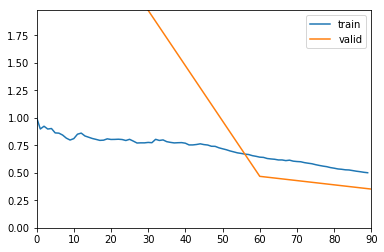

epoch,train_loss,valid_loss,accuracy,time
0,0.312776,0.328158,0.863330,00:26
1,0.271407,0.299868,0.880765,00:25
2,0.240118,0.230624,0.908886,00:25
3,0.218853,0.228628,0.907762,00:24
4,0.204381,0.230788,0.906637,00:25


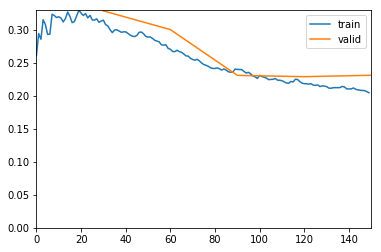

epoch,train_loss,valid_loss,accuracy,time
0,0.739769,0.943048,0.719910,00:23
1,0.630679,0.477870,0.834083,00:24
2,0.492060,0.411162,0.830146,00:25


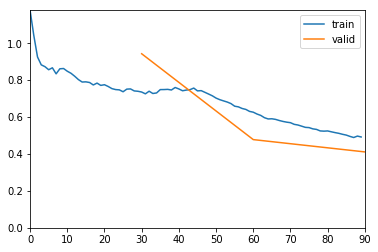

epoch,train_loss,valid_loss,accuracy,time
0,0.345991,0.359061,0.866142,00:25
1,0.294107,0.266809,0.886952,00:25
2,0.258015,0.260549,0.893701,00:24
3,0.230726,0.256283,0.893701,00:25
4,0.213172,0.254949,0.892013,00:24


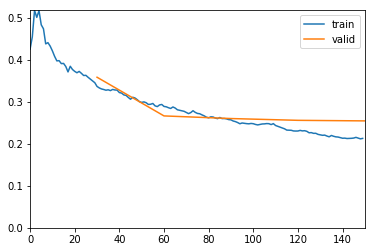

epoch,train_loss,valid_loss,accuracy,time
0,0.748592,1.014776,0.741282,00:23
1,0.637406,0.417160,0.837458,00:24
2,0.481236,0.390249,0.839708,00:23


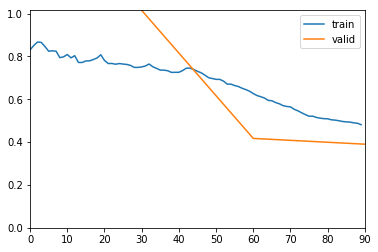

epoch,train_loss,valid_loss,accuracy,time
0,0.319884,0.320112,0.874578,00:25
1,0.301712,0.349238,0.858830,00:25
2,0.263651,0.291014,0.881890,00:25
3,0.238090,0.257760,0.895950,00:24
4,0.219172,0.259140,0.894263,00:26


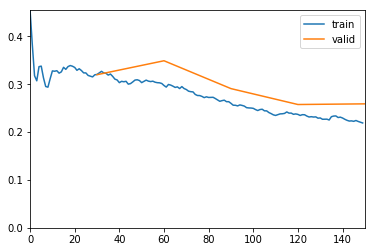

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_6


epoch,train_loss,valid_loss,accuracy,time
0,0.786463,1.062061,0.750844,00:25
1,0.637600,0.578570,0.819460,00:25
2,0.516055,0.383586,0.837458,00:26


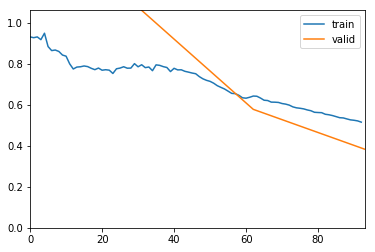

epoch,train_loss,valid_loss,accuracy,time
0,0.337500,0.306265,0.875141,00:25
1,0.286683,0.301975,0.868954,00:26
2,0.249885,0.265433,0.899325,00:26
3,0.226172,0.252448,0.903262,00:27
4,0.213478,0.248916,0.902700,00:26


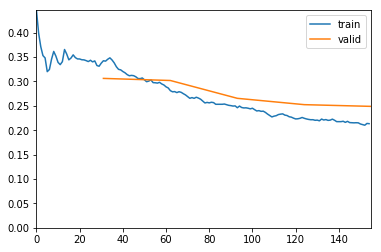

epoch,train_loss,valid_loss,accuracy,time
0,0.797988,0.990996,0.701350,00:25
1,0.666057,0.416713,0.832396,00:23
2,0.504412,0.397811,0.822835,00:22


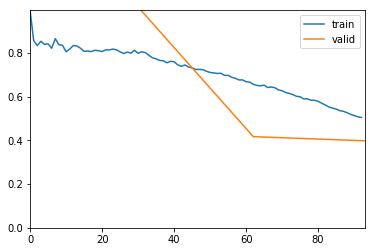

epoch,train_loss,valid_loss,accuracy,time
0,0.332719,0.333303,0.867267,00:26
1,0.280809,0.379487,0.892013,00:26
2,0.260905,0.861736,0.900450,00:26
3,0.233500,0.248490,0.893138,00:25
4,0.216617,0.235874,0.900450,00:25


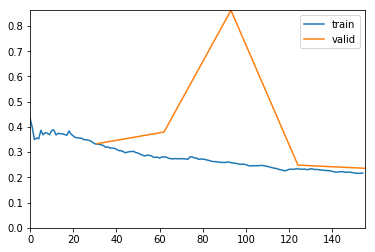

epoch,train_loss,valid_loss,accuracy,time
0,0.835836,1.339273,0.706412,00:25
1,0.654863,0.579557,0.776153,00:24
2,0.503711,0.423867,0.820585,00:25


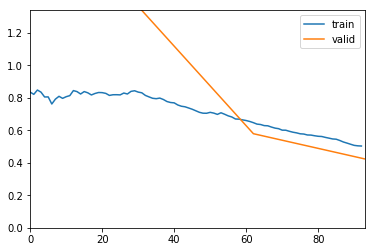

epoch,train_loss,valid_loss,accuracy,time
0,0.353540,0.356987,0.849831,00:25
1,0.290272,0.261603,0.899888,00:26
2,0.255700,0.236745,0.905512,00:24
3,0.235330,0.246713,0.895388,00:25
4,0.215433,0.241290,0.895950,00:25


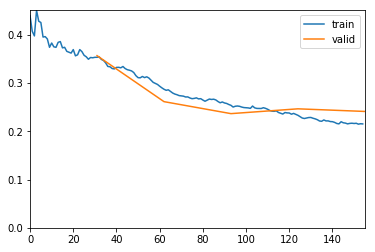

epoch,train_loss,valid_loss,accuracy,time
0,0.792218,1.230752,0.721597,00:25
1,0.622292,0.732155,0.753656,00:24
2,0.508763,0.506632,0.800337,00:25


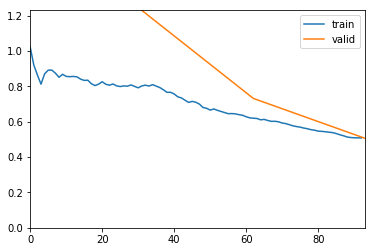

epoch,train_loss,valid_loss,accuracy,time
0,0.356497,0.399484,0.828459,00:26
1,0.284871,0.390861,0.859955,00:26
2,0.256031,0.307349,0.892013,00:25
3,0.224287,0.253407,0.892576,00:25
4,0.213170,0.249806,0.894826,00:26


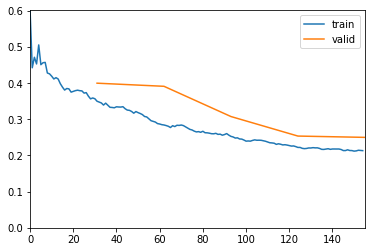

epoch,train_loss,valid_loss,accuracy,time
0,0.819349,0.941403,0.720472,00:24
1,0.715540,0.532684,0.801462,00:25
2,0.519977,0.376626,0.843645,00:25


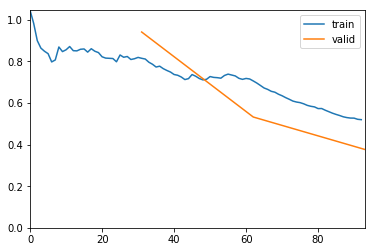

epoch,train_loss,valid_loss,accuracy,time
0,0.306375,0.326645,0.862205,00:26
1,0.285114,0.280732,0.886389,00:27
2,0.250374,0.233239,0.912261,00:25
3,0.223918,0.238942,0.905512,00:25
4,0.203896,0.243846,0.902700,00:25


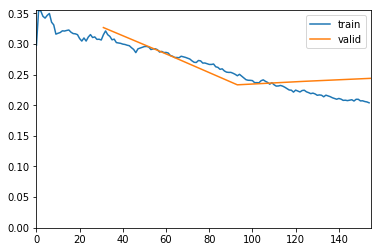

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_7


epoch,train_loss,valid_loss,accuracy,time
0,0.810892,1.278756,0.688414,00:26
1,0.638378,0.488475,0.818335,00:24
2,0.507829,0.406869,0.830709,00:24


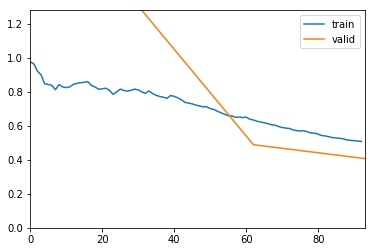

epoch,train_loss,valid_loss,accuracy,time
0,0.332856,0.390489,0.841957,00:26
1,0.295213,0.321985,0.864454,00:25
2,0.263979,0.262454,0.892576,00:26
3,0.248379,0.238981,0.901575,00:26
4,0.221736,0.236366,0.905512,00:26


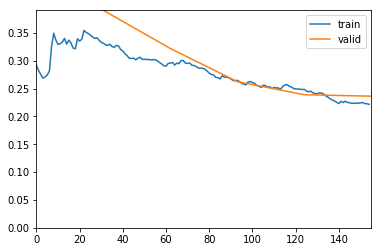

epoch,train_loss,valid_loss,accuracy,time
0,0.800489,1.076323,0.735096,00:24
1,0.658842,0.448811,0.814398,00:24
2,0.500490,0.443716,0.808211,00:24


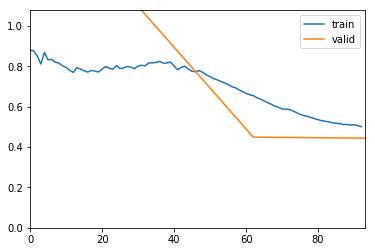

epoch,train_loss,valid_loss,accuracy,time
0,0.344838,0.374496,0.838020,00:25
1,0.299828,0.316064,0.881327,00:25
2,0.254720,0.271479,0.886952,00:26
3,0.231369,0.254748,0.897075,00:26
4,0.202885,0.240565,0.907199,00:26


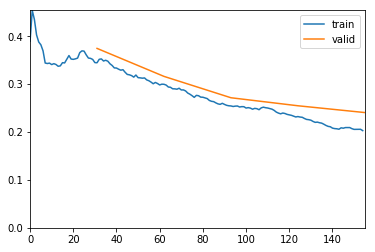

epoch,train_loss,valid_loss,accuracy,time
0,0.784116,1.123639,0.696850,00:25
1,0.593126,0.454867,0.827897,00:24
2,0.448525,0.378291,0.842520,00:24


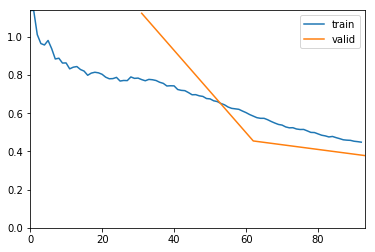

epoch,train_loss,valid_loss,accuracy,time
0,0.317068,0.309500,0.878515,00:25
1,0.282758,0.275063,0.894826,00:25
2,0.238441,0.236736,0.911699,00:25
3,0.216126,0.233599,0.910011,00:26
4,0.196997,0.229427,0.908324,00:26


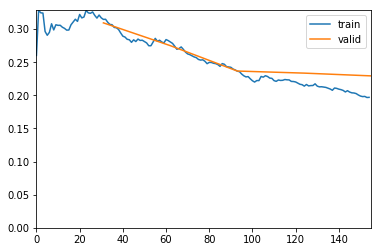

epoch,train_loss,valid_loss,accuracy,time
0,0.823536,1.736891,0.672666,00:24
1,0.681688,0.531878,0.796963,00:25
2,0.506032,0.377582,0.840832,00:24


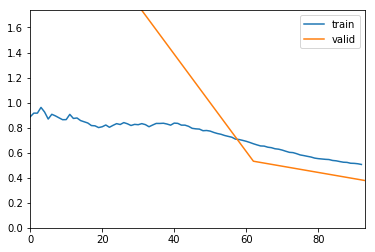

epoch,train_loss,valid_loss,accuracy,time
0,0.289251,0.375308,0.835771,00:25
1,0.272831,0.273643,0.882452,00:25
2,0.233576,0.218096,0.912823,00:25
3,0.198484,0.222496,0.907762,00:27
4,0.183549,0.229129,0.901575,00:26


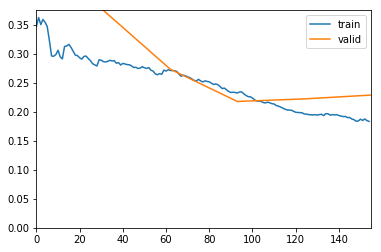

epoch,train_loss,valid_loss,accuracy,time
0,0.788191,1.251498,0.690101,00:24
1,0.607661,0.592236,0.813273,00:25
2,0.501008,0.389010,0.834083,00:24


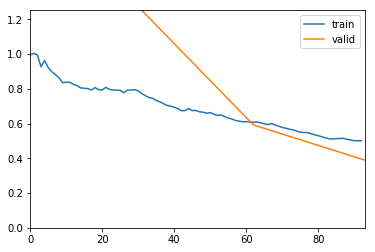

epoch,train_loss,valid_loss,accuracy,time
0,0.314424,0.332329,0.862767,00:25
1,0.258820,0.268340,0.895388,00:25
2,0.244155,0.234209,0.908886,00:26
3,0.233131,0.236535,0.904387,00:25
4,0.224101,0.222233,0.912261,00:26


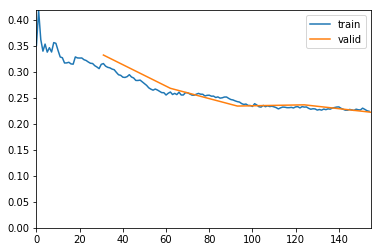

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_8


epoch,train_loss,valid_loss,accuracy,time
0,0.761237,1.338671,0.662542,00:28
1,0.633808,0.490170,0.820023,00:25
2,0.476157,0.365460,0.850956,00:25


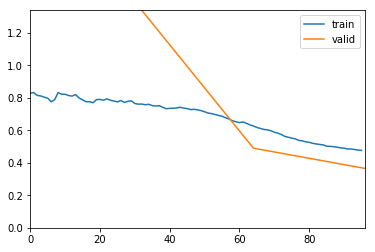

epoch,train_loss,valid_loss,accuracy,time
0,0.313072,0.346314,0.848144,00:26
1,0.291134,0.282632,0.892576,00:27
2,0.259333,0.256884,0.901012,00:27
3,0.236577,0.255519,0.898200,00:26
4,0.219581,0.255331,0.895950,00:26


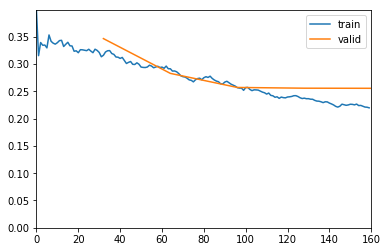

epoch,train_loss,valid_loss,accuracy,time
0,0.800763,0.905336,0.763217,00:24
1,0.617026,0.471196,0.812148,00:25
2,0.506402,0.339951,0.866704,00:25


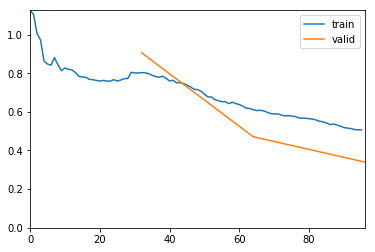

epoch,train_loss,valid_loss,accuracy,time
0,0.347317,0.301614,0.881890,00:27
1,0.284242,0.257445,0.897075,00:27
2,0.252265,0.235394,0.905512,00:27
3,0.225117,0.233405,0.907199,00:26
4,0.210328,0.231226,0.904949,00:26


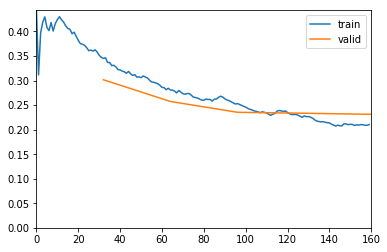

epoch,train_loss,valid_loss,accuracy,time
0,0.774890,1.118004,0.682790,00:25
1,0.654803,0.410012,0.849269,00:25
2,0.504117,0.337833,0.865579,00:25


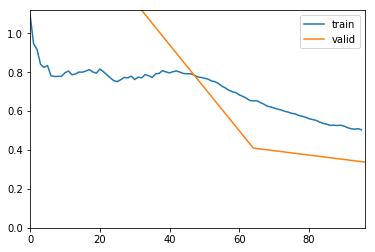

epoch,train_loss,valid_loss,accuracy,time
0,0.332220,0.420706,0.879078,00:26
1,0.326005,0.272971,0.903825,00:27
2,0.285697,0.254113,0.898200,00:27
3,0.251111,0.240073,0.905512,00:26
4,0.228062,0.292731,0.906074,00:27


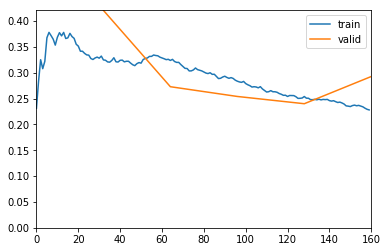

epoch,train_loss,valid_loss,accuracy,time
0,0.777736,0.978693,0.682227,00:25
1,0.629061,0.415517,0.838020,00:25
2,0.477355,0.385684,0.841957,00:25


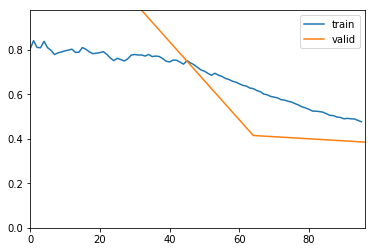

epoch,train_loss,valid_loss,accuracy,time
0,0.324355,0.320331,0.870641,00:27
1,0.301560,0.289880,0.891451,00:26
2,0.270857,0.241546,0.911699,00:26
3,0.243758,0.220572,0.916760,00:26
4,0.218011,0.218724,0.913948,00:26


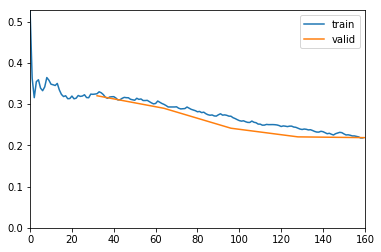

epoch,train_loss,valid_loss,accuracy,time
0,0.833241,0.863308,0.724409,00:25
1,0.718572,0.421720,0.821147,00:25
2,0.530491,0.352929,0.851519,00:25


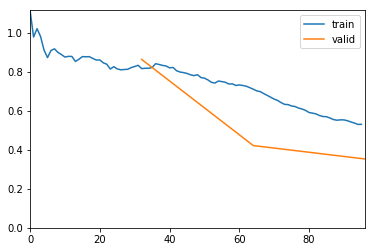

epoch,train_loss,valid_loss,accuracy,time
0,0.350835,0.321865,0.874016,00:27
1,0.305072,0.292107,0.878515,00:25
2,0.263791,0.247102,0.896513,00:26
3,0.241198,0.242041,0.895388,00:26
4,0.219035,0.230778,0.896513,00:27


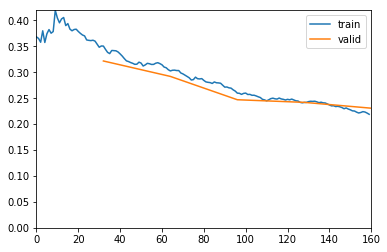

D:\ProgProjekte\Python\Results-Exact-Study\Patches\ExpertAlgorithm\NrExperts\NrExperts_9


epoch,train_loss,valid_loss,accuracy,time
0,0.781537,1.259052,0.701350,00:27
1,0.621215,0.493056,0.837458,00:25
2,0.487408,0.377333,0.848706,00:25


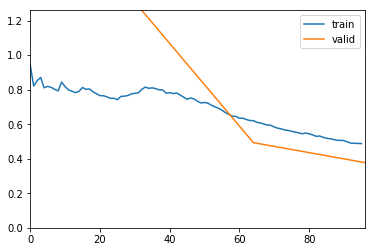

epoch,train_loss,valid_loss,accuracy,time
0,0.348607,0.300782,0.883015,00:26
1,0.288017,0.276218,0.888639,00:25
2,0.259983,0.236146,0.910011,00:26
3,0.237420,0.239956,0.907199,00:26
4,0.217096,0.230954,0.912823,00:26


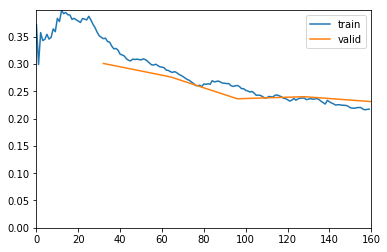

epoch,train_loss,valid_loss,accuracy,time
0,0.782226,1.133222,0.710349,00:25
1,0.599558,0.545810,0.813836,00:25
2,0.473554,0.366876,0.845332,00:26


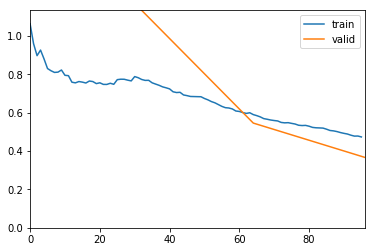

epoch,train_loss,valid_loss,accuracy,time
0,0.314448,0.324833,0.870079,00:26
1,0.278452,0.265451,0.898763,00:26
2,0.257607,0.271743,0.890326,00:25
3,0.251295,0.241882,0.907199,00:26
4,0.225841,0.237355,0.906074,00:26


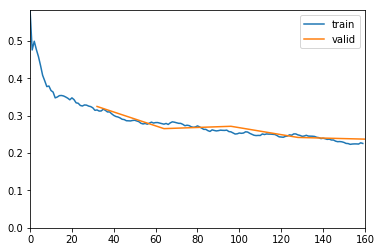

epoch,train_loss,valid_loss,accuracy,time
0,0.823408,0.907756,0.731159,00:24
1,0.662490,0.407681,0.834083,00:26
2,0.496006,0.368641,0.848706,00:26


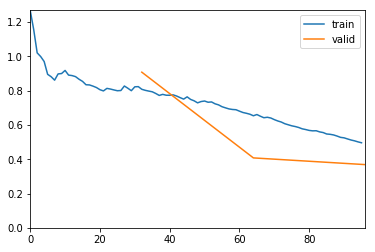

epoch,train_loss,valid_loss,accuracy,time
0,0.315475,0.334272,0.861080,00:27
1,0.273766,0.274871,0.891451,00:26
2,0.250119,0.262491,0.894263,00:26
3,0.221849,0.239789,0.904949,00:26
4,0.209354,0.239007,0.904387,00:26


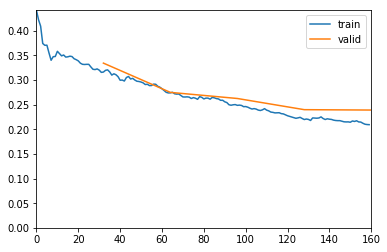

epoch,train_loss,valid_loss,accuracy,time
0,0.798989,0.890615,0.748594,00:24
1,0.648449,0.426125,0.833521,00:25
2,0.480194,0.361279,0.846457,00:25


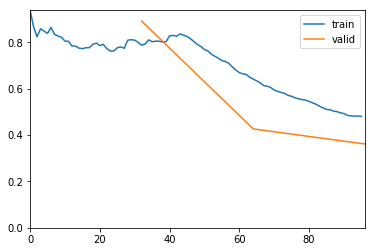

epoch,train_loss,valid_loss,accuracy,time
0,0.324636,0.300214,0.879640,00:26
1,0.279567,0.318680,0.861642,00:27
2,0.260918,0.232038,0.907762,00:26
3,0.232049,0.220342,0.915073,00:26
4,0.217372,0.219965,0.912261,00:27


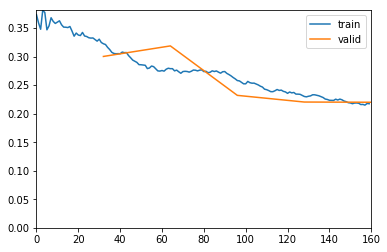

epoch,train_loss,valid_loss,accuracy,time
0,0.766599,1.124623,0.740157,00:25
1,0.642425,0.506912,0.794713,00:25
2,0.486977,0.356289,0.841957,00:25


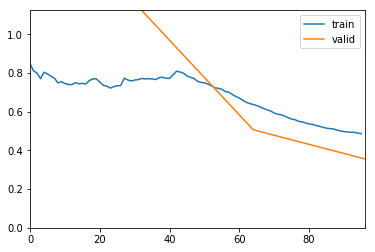

epoch,train_loss,valid_loss,accuracy,time
0,0.294828,0.328441,0.875141,00:26
1,0.264464,0.258781,0.898200,00:26
2,0.245372,0.252588,0.901012,00:26
3,0.213492,0.244187,0.899325,00:26
4,0.212651,0.249784,0.894826,00:27


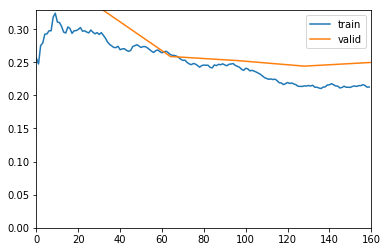

In [7]:
results = {}
for user in path.glob("*"):
    folder = path/user
    print(folder)
    
    acc_values = []
    for i in range(5):
        learn = cnn_learner(get_data(folder, bs=64, size=64), models.resnet18, metrics=[accuracy], callback_fns=[ShowGraph])

        lr = 0.05
        learn.fit_one_cycle(3, slice(lr))
        learn.unfreeze()

        lr = 0.001
        learn.fit_one_cycle(5, slice(lr))
        
        acc_values.append(float(np.max(learn.recorder.metrics)))  
    
    results[user.stem] = np.mean(acc_values)

In [8]:
import json
with open('NrExperts_Algorithm.json', 'w') as fp:
    json.dump(results, fp)

In [9]:
results

{'NrExperts_10': 0.9088863730430603,
 'NrExperts_2': 0.9030371069908142,
 'NrExperts_3': 0.9006749033927918,
 'NrExperts_4': 0.9030371069908142,
 'NrExperts_5': 0.9050618529319763,
 'NrExperts_6': 0.9032620787620544,
 'NrExperts_7': 0.9098987460136414,
 'NrExperts_8': 0.9055117964744568,
 'NrExperts_9': 0.9082114577293396}